## Import Libraries

In [55]:
# You may need to install some of the libraries below
# If so, uncomment any of the below commands
# !pip install matplotlib
# !pip install seaborn
# !pip install mplcyberpunk
# !pip install scikit-learn
# !pip install pickle

In [56]:
import pandas as pd
import regex as re
import numpy as np
import logging

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
%config InlineBackend.figure_formats = ['svg']

# ML Modeling
from sklearn.metrics import precision_recall_fscore_support,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay,roc_curve
from sklearn.preprocessing import normalize
# Saving and importing trained models
import pickle

## 2. Import and Review the Data

In [57]:
# Imports the noted CSV file as a pandas DataFrame based on the path below
df = pd.read_csv("data/original-dataset.csv", delimiter=",", encoding='utf-8')

/var/folders/rj/l_96jjr56y39j9jw2hnmv_wh0000gn/T/ipykernel_1694/617997427.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/original-dataset.csv", delimiter=",", encoding='utf-8')


### 2.1 General shape and content of the dataset

In [58]:
df.shape

(153434, 18)

In [59]:
df.head(5)

,ARREST BOOKING NO_PK,GO NO,PIN,AGE,SEX,RACE,ETHNICITY,ARREST DATE,ARREST TIME,LOCATION OF ARREST_BLOCK,ARREST REASON,ARREST TYPE,BEAT,SUMMARY OF FACTS,ARREST OFFICER,officer_name,CURRENT STATUS,YOUNG OFFENDER
0,SJ20168067,SJ2016161030552,441897259,33.0,M,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,04/12/16,1425.0,ROBERTS AV / PHELAN AV,CRIMINAL CITATION,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,L2,SJ-TRESP ON CITY PROPERTY WHEN CLOSED UPON ORD...,057P,ABE,CITED,N
1,SJ20168127,SJ2016161030674,212271361,27.0,M,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,04/12/16,1701.0,1300 BLOCK SENTER RD,CRIMINAL CITATION,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,L2,SJ-TRESP ON CITY PROPERTY WHEN CLOSED UPON ORD...,057P,ABE,CITED,N
2,SJ20168067,SJ2016J3297232 C,441897259,33.0,M,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,04/12/16,1425.0,ROBERTS AV / PHELAN AV,CRIMINAL CITATION,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,L2,SJ-TRESP ON CITY PROPERTY WHEN CLOSED UPON ORD...,057P,ABE,CITED,N
3,SJ20168127,SJ2016J3297233 C,212271361,27.0,M,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,04/12/16,1701.0,1300 BLOCK SENTER RD,CRIMINAL CITATION,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,L2,SJ-TRESP ON CITY PROPERTY WHEN CLOSED UPON ORD...,057P,ABE,CITED,N
4,SJ20153325,NaN,441844005,52.0,F,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,02/25/15,1500.0,ROBERTS AV / STORY RD,CRIMINAL CITATION,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,L2,SJ-TRESP ON CITY PROPERTY WHEN CLOSED UPON ORD...,057P,ABE,CITED,N


In [60]:
df.describe()

,PIN,AGE,ARREST TIME
count,1.534340e+05,153352.000000,153422.000000
mean,4.050585e+08,34.969267,1375.358554
std,9.573970e+07,12.717352,700.107685
min,6.579400e+04,5.000000,0.000000
25%,4.417536e+08,25.000000,935.000000
50%,4.418847e+08,33.000000,1523.000000
75%,4.420149e+08,44.000000,1930.000000
max,4.422767e+08,95.000000,2359.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153434 entries, 0 to 153433
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST BOOKING NO_PK      153434 non-null  object 
 1   GO NO                     124373 non-null  object 
 2   PIN                       153434 non-null  int64  
 3   AGE                       153352 non-null  float64
 4   SEX                       153347 non-null  object 
 5   RACE                      153433 non-null  object 
 6   ETHNICITY                 153272 non-null  object 
 7   ARREST DATE               153434 non-null  object 
 8   ARREST TIME               153422 non-null  float64
 9   LOCATION OF ARREST_BLOCK  153434 non-null  object 
 10  ARREST REASON             153404 non-null  object 
 11  ARREST TYPE               153434 non-null  object 
 12  BEAT                      137510 non-null  object 
 13  SUMMARY OF FACTS          153434 non-null  o

## 3. Summary Statistics &amp; Data Processing

In [62]:
df.describe(include='all')

,ARREST BOOKING NO_PK,GO NO,PIN,AGE,SEX,RACE,ETHNICITY,ARREST DATE,ARREST TIME,LOCATION OF ARREST_BLOCK,ARREST REASON,ARREST TYPE,BEAT,SUMMARY OF FACTS,ARREST OFFICER,officer_name,CURRENT STATUS,YOUNG OFFENDER
count,153434,124373,1.534340e+05,153352.000000,153347,153433,153272,153434,153422.000000,153434,153404,153434,137510,153434,104192,104140,153434,153434
unique,124395,108326,NaN,NaN,3,19,19,2100,NaN,22074,11,2,88,8185,1403,1108,3,2
top,SJ20175880,SJ2018WARRANT C,NaN,NaN,M,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,06/21/19,NaN,NO LOCATION INCLUDED IN RECORD,CRIMINAL CITATION,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,L4,POSSESS UNLAWFUL PARAPHERNALIA (CITE),2869,GUERRA,CHARGED/BOOKED,N
freq,15,824,NaN,NaN,117072,83551,83360,150,NaN,8424,75193,95097,5411,7146,1202,1250,76304,145293
mean,NaN,NaN,4.050585e+08,34.969267,NaN,NaN,NaN,NaN,1375.358554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.573970e+07,12.717352,NaN,NaN,NaN,NaN,700.107685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,6.579400e+04,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.417536e+08,25.000000,NaN,NaN,NaN,NaN,935.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.418847e+08,33.000000,NaN,NaN,NaN,NaN,1523.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.420149e+08,44.000000,NaN,NaN,NaN,NaN,1930.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.1 Rename Columns

In [63]:
df = df.rename(columns={
    'ARREST BOOKING NO_PK': 'arrest_unique_id', 
    'GO NO': 'incident_number', 
    'PIN': 'pin', 
    'AGE': 'age', 
    'SEX': 'sex', 
    'RACE': 'race', 
    'ETHNICITY': 'ethnicity', 
    'ARREST DATE': 'arrest_date', 
    'ARREST TIME': 'arrest_time', 
    'LOCATION OF ARREST_BLOCK': 'location_of_arrest_in_block', 
    'ARREST REASON': 'arrest_reason', 
    'ARREST TYPE': 'arrest_type', 
    'BEAT': 'beat', 
    'SUMMARY OF FACTS': 'summary_of_facts', 
    'ARREST OFFICER': 'arrest_officer', 
    'CURRENT STATUS': 'current_status', 
    'YOUNG OFFENDER': 'young_offender'
    })

In [64]:
df.head()

,arrest_unique_id,incident_number,pin,age,sex,race,ethnicity,arrest_date,arrest_time,location_of_arrest_in_block,arrest_reason,arrest_type,beat,summary_of_facts,arrest_officer,officer_name,current_status,young_offender
0,SJ20168067,SJ2016161030552,441897259,33.0,M,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,04/12/16,1425.0,ROBERTS AV / PHELAN AV,CRIMINAL CITATION,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,L2,SJ-TRESP ON CITY PROPERTY WHEN CLOSED UPON ORD...,057P,ABE,CITED,N
1,SJ20168127,SJ2016161030674,212271361,27.0,M,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,04/12/16,1701.0,1300 BLOCK SENTER RD,CRIMINAL CITATION,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,L2,SJ-TRESP ON CITY PROPERTY WHEN CLOSED UPON ORD...,057P,ABE,CITED,N
2,SJ20168067,SJ2016J3297232 C,441897259,33.0,M,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,04/12/16,1425.0,ROBERTS AV / PHELAN AV,CRIMINAL CITATION,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,L2,SJ-TRESP ON CITY PROPERTY WHEN CLOSED UPON ORD...,057P,ABE,CITED,N
3,SJ20168127,SJ2016J3297233 C,212271361,27.0,M,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,04/12/16,1701.0,1300 BLOCK SENTER RD,CRIMINAL CITATION,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,L2,SJ-TRESP ON CITY PROPERTY WHEN CLOSED UPON ORD...,057P,ABE,CITED,N
4,SJ20153325,NaN,441844005,52.0,F,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,02/25/15,1500.0,ROBERTS AV / STORY RD,CRIMINAL CITATION,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,L2,SJ-TRESP ON CITY PROPERTY WHEN CLOSED UPON ORD...,057P,ABE,CITED,N


### 3.2 Drop Columns

In [66]:
df = df.drop(columns='beat')

### 3.3 Dealing with missing data .isna() / .notna()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153434 entries, 0 to 153433
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   arrest_unique_id             153434 non-null  object 
 1   incident_number              124373 non-null  object 
 2   pin                          153434 non-null  int64  
 3   age                          153352 non-null  float64
 4   sex                          153347 non-null  object 
 5   race                         153433 non-null  object 
 6   ethnicity                    153272 non-null  object 
 7   arrest_date                  153434 non-null  object 
 8   arrest_time                  153422 non-null  float64
 9   location_of_arrest_in_block  153434 non-null  object 
 10  arrest_reason                153404 non-null  object 
 11  arrest_type                  153434 non-null  object 
 12  summary_of_facts             153434 non-null  object 
 13 

Notice how there are lots of missing values: of the total 153434 rows, the arrest reason' columns only have 153404 values.

Let's first examine this to better understand it.

### Check NULL in the datasets

In [68]:
df.isnull().sum()

arrest_unique_id                   0
incident_number                29061
pin                                0
age                               82
sex                               87
race                               1
ethnicity                        162
arrest_date                        0
arrest_time                       12
location_of_arrest_in_block        0
arrest_reason                     30
arrest_type                        0
summary_of_facts                   0
arrest_officer                 49242
officer_name                   49294
current_status                     0
young_offender                     0
dtype: int64

In [69]:
df[df['arrest_reason'].isna()].head(5)

,arrest_unique_id,incident_number,pin,age,sex,race,ethnicity,arrest_date,arrest_time,location_of_arrest_in_block,arrest_reason,arrest_type,summary_of_facts,arrest_officer,officer_name,current_status,young_offender
1659,SJ20205424,SJ2020200380457,223478286,59.0,M,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,02/07/20,1500.0,400 BLOCK N 1ST ST,NaN,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,CONFINEMENT PENDING HEARING (REMB),4596,ALVAREZ,CHARGED/BOOKED,N
3611,SJ20182042,NaN,441779324,41.0,F,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,01/31/18,1059.0,1900 BLOCK LAS PLUMAS AV,NaN,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,CONFINEMENT PENDING DECISION ON REQUEST FOR RE...,3233,ARDIZZONE,CHARGED/BOOKED,N
24242,SJ20208893,NaN,442254649,42.0,M,CAUCASIAN,CAUCASIAN,06/04/20,1315.0,400 BLOCK N 1ST ST,NaN,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,CONFINEMENT PENDING HEARING (REMB),4635,DEGRAVE,CHARGED/BOOKED,N
25008,SJ20208422,SJ2020201200869,442254313,60.0,M,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,04/29/20,2010.0,100 BLOCK N 33RD ST,NaN,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,CONFINEMENT PENDING HEARING (REMB),3946,DELOSSANTOS,CHARGED/BOOKED,N
28998,SJ201813206,NaN,163578113,46.0,M,HISPANIC/LATIN/MEXICAN,HISPANIC/LATIN/MEXICAN,08/02/18,1011.0,900 BLOCK LOCUST ST,NaN,TAKEN INTO CUSTODY/WARRANT ARREST ONLY,INFLICT CORPORAL INJ SPOUSE/COHAB (REMB),4613,ESPINO,CHARGED/BOOKED,N


This is important information for the sake of better understanding our dataset. But it's also important because `NaN` values are treated as *floats*, not *strings*. If we tried to manipulate this column as text data, we would get an error. For this reason, we're going to replace or "fill" these `NaN` values with the string "No Arrest Reason" by using the `.fillna()` method.

In [70]:
df['arrest_reason'] = df['arrest_reason'].fillna('No Arrest Reason')

In [71]:
df[df['arrest_reason'].isna()]

,arrest_unique_id,incident_number,pin,age,sex,race,ethnicity,arrest_date,arrest_time,location_of_arrest_in_block,arrest_reason,arrest_type,summary_of_facts,arrest_officer,officer_name,current_status,young_offender


Repeat this Process For The Other Columns

In [72]:
df['incident_number'] = df['incident_number'].fillna('No Incident Number')
df['age'] = df['age'].fillna('No Age Data')
df['sex'] = df['sex'].fillna('No Sex Data')
df['race'] = df['race'].fillna('No Race Data')
df['ethnicity'] = df['ethnicity'].fillna('No Ethnicity Data')
df['arrest_time'] = df['arrest_time'].fillna('No Time Data')
df['arrest_officer'] = df['arrest_officer'].fillna('No Officer Data')
df['officer_name'] = df['officer_name'].fillna('No Officer Data')

df.isnull().sum()

arrest_unique_id               0
incident_number                0
pin                            0
age                            0
sex                            0
race                           0
ethnicity                      0
arrest_date                    0
arrest_time                    0
location_of_arrest_in_block    0
arrest_reason                  0
arrest_type                    0
summary_of_facts               0
arrest_officer                 0
officer_name                   0
current_status                 0
young_offender                 0
dtype: int64

### 3.4 Check for Duplicates 

In [73]:
df.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
153429    False
153430    False
153431    False
153432    False
153433    False
Length: 153434, dtype: bool

In [74]:
df[df.duplicated(keep=False)]

,arrest_unique_id,incident_number,pin,age,sex,race,ethnicity,arrest_date,arrest_time,location_of_arrest_in_block,arrest_reason,arrest_type,summary_of_facts,arrest_officer,officer_name,current_status,young_offender


## 8. Counting Values

In [76]:
df['race'].value_counts()

race
HISPANIC/LATIN/MEXICAN            83551
CAUCASIAN                         32359
AFRICAN AMERICAN                  19314
OTHER ASIAN                        5795
VIETNAMESE                         5202
OTHER                              2061
FILIPINO                           1680
UNKNOWN                             857
ASIAN INDIAN                        662
PACIFIC ISLANDER                    459
AMERICAN INDIAN/ALASKAN NATIVE      457
CHINESE                             405
SAMOAN                              294
KOREAN                              104
CAMBODIAN                            88
HAWAIIAN                             66
JAPANESE                             37
GUAMANIAN                            22
LAOTIAN                              20
No Race Data                          1
Name: count, dtype: int64

Look through the "race" recorded in the San Jose arrests data and consider what these categories reflect about Sna Jose city from 2015-2020, particularly with regard to immigration status.

To select the top 10 most frequent values in the "race" column, we can combine `value_counts()` with regular Python list slicing.

In [78]:
df['race'].value_counts()[:10]

race
HISPANIC/LATIN/MEXICAN    83551
CAUCASIAN                 32359
AFRICAN AMERICAN          19314
OTHER ASIAN                5795
VIETNAMESE                 5202
OTHER                      2061
FILIPINO                   1680
UNKNOWN                     857
ASIAN INDIAN                662
PACIFIC ISLANDER            459
Name: count, dtype: int64

In [80]:
df['arrest_reason'].value_counts()[:10]

arrest_reason
CRIMINAL CITATION        75193
ON VIEW                  57767
LOCAL BENCH WARRANT      13786
LOCAL ARREST WARRANT      3055
WARRANT                   1741
OUT OF COUNTY WARRANT     1347
PROBATION HOLD             495
No Arrest Reason            30
PAROLE HOLD                 10
COMPLAINT                    8
Name: count, dtype: int64

### 2.2 Review particular columns

#### 2.2.1 Describe and examine the `RACE` column

##### What are the summary stats for the `RACE`?

In [81]:
df.race.describe()

count                     153434
unique                        20
top       HISPANIC/LATIN/MEXICAN
freq                       83551
Name: race, dtype: object

<Axes: xlabel='race'>

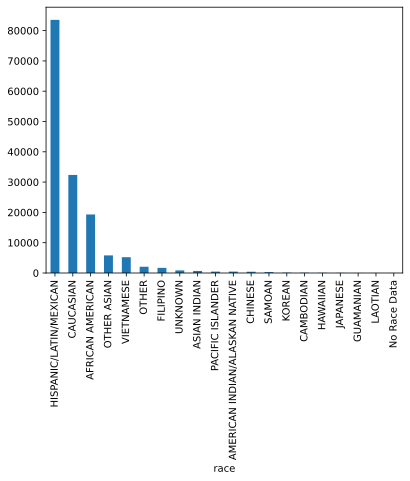

In [82]:
df['race'].value_counts().plot(kind='bar')

In [83]:
'''
  .hist() -- Creates a histogram chart with a dataframe's Series 
  
  Histograms place a metric in bins -- dates in this case -- to understand the distribution of the data. In this case, the distribution of the data over time
'''

df.arrest_date.hist(
  figsize=(12,6),
  color='#86bf91',
)

<Axes: >

## 11. Write to CSV

In [ ]:
df.to_csv("data/processed-dataset.csv", encoding='utf-8', index=False)